In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
application = pd.read_csv("~/Downloads/home-credit-default-risk/application_test.csv")
payments = pd.read_csv("~/Downloads/home-credit-default-risk/installments_payments.csv")

In [29]:
payments_filtered = payments.filter(["SK_ID_CURR", "NUM_INSTALMENT_NUMBER"])
merged_df = pd.merge(application.filter(["SK_ID_CURR","AMT_CREDIT"]), payments_filtered, on="SK_ID_CURR", how="inner")
merged_df["AGE"] = application["DAYS_BIRTH"].abs().div(365).round()
merged_df["EMPLOYED"] = application["DAYS_EMPLOYED"].abs().div(365).round()
merged_df["DAYS_LATE"] = payments["DAYS_INSTALMENT"] - payments["DAYS_ENTRY_PAYMENT"]
merged_df["PAID"] = payments["AMT_INSTALMENT"] - payments["AMT_PAYMENT"]
merged_df.head()

,SK_ID_CURR,AMT_CREDIT,NUM_INSTALMENT_NUMBER,AGE,EMPLOYED,DAYS_LATE,PAID
0,100001,568800.0,1,53.0,6.0,7.0,0.000
1,100001,568800.0,2,49.0,12.0,0.0,0.000
2,100001,568800.0,2,55.0,12.0,0.0,0.000
3,100001,568800.0,4,38.0,5.0,8.0,0.000
4,100001,568800.0,4,36.0,6.0,-17.0,4.455


(0.0, 15.0)

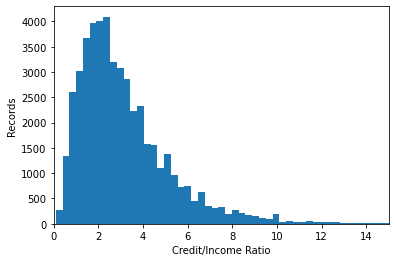

In [4]:
credit = application["AMT_CREDIT"]
income = application["AMT_INCOME_TOTAL"]
plt.hist(credit/income, bins=100)
plt.ylabel("Records")
plt.xlabel("Credit/Income Ratio")
plt.xlim([0,15])

(0.0, 1.0)

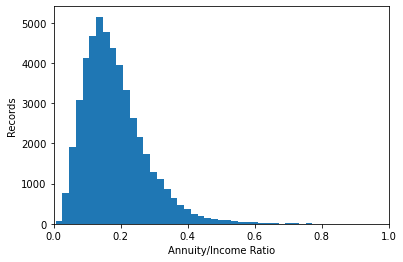

In [5]:
annuity = application["AMT_ANNUITY"]
income = application["AMT_INCOME_TOTAL"]
plt.hist(annuity/income, bins=100)
plt.ylabel("Records")
plt.xlabel("Annuity/Income Ratio")
plt.xlim([0,1])

(0.0, 200.0)

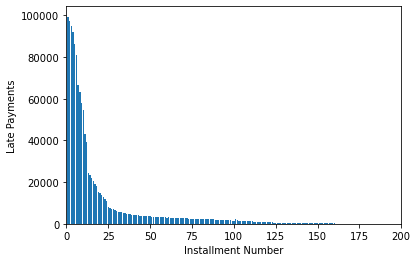

In [73]:
merged_df["IS_LATE"] = merged_df.apply(lambda x: 1 if x['DAYS_LATE'] > 0 else 0,axis=1)
bars = merged_df["NUM_INSTALMENT_NUMBER"].unique()
late_payments = []
for bar in bars:
    temp_df = merged_df.loc[merged_df["NUM_INSTALMENT_NUMBER"] == bar]
    temp_total = temp_df["IS_LATE"].sum()
    late_payments.append(temp_total)
plt.bar(bars, late_payments)
plt.xlabel("Installment Number")
plt.ylabel("Late Payments")
plt.xlim([0,200])

(0.0, 200.0)

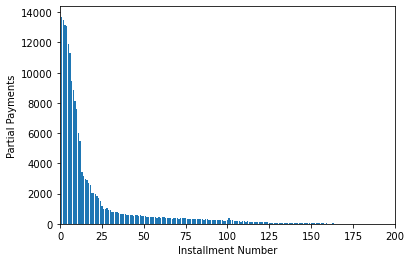

In [74]:
merged_df["PARTIAL"] = merged_df.apply(lambda x: 1 if x['PAID'] > 0 else 0,axis=1)
# bars = merged_df["NUM_INSTALMENT_NUMBER"].unique()
heights = []
for bar in bars:
    temp_df = merged_df.loc[merged_df["NUM_INSTALMENT_NUMBER"] == bar]
    temp_total = temp_df["PARTIAL"].sum()
    heights.append(temp_total)
plt.bar(bars, heights)
plt.xlabel("Installment Number")
plt.ylabel("Partial Payments")
plt.xlim([0,200])

(0.0, 3500.0)

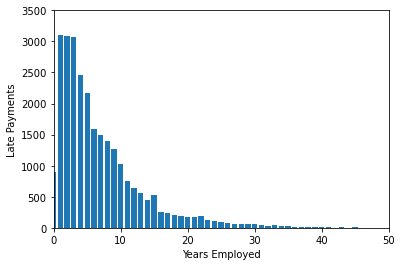

In [91]:
merged_df["IS_LATE"] = merged_df.apply(lambda x: 1 if x['DAYS_LATE'] > 0 else 0,axis=1)
bars = merged_df["EMPLOYED"].unique()
late_payments = []
for bar in bars:
    temp_df = merged_df.loc[merged_df["EMPLOYED"] == bar]
    temp_total = temp_df["IS_LATE"].sum()
    late_payments.append(temp_total)
plt.bar(bars, late_payments)
plt.xlabel("Years Employed")
plt.ylabel("Late Payments")
plt.xlim([0,50])
plt.ylim([0,3500])

(0.0, 1000.0)

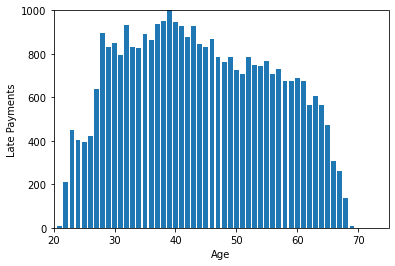

In [94]:
merged_df["IS_LATE"] = merged_df.apply(lambda x: 1 if x['DAYS_LATE'] > 0 else 0,axis=1)
bars = merged_df["AGE"].unique()
late_payments = []
for bar in bars:
    temp_df = merged_df.loc[merged_df["AGE"] == bar]
    temp_total = temp_df["IS_LATE"].sum()
    late_payments.append(temp_total)
plt.bar(bars, late_payments)
plt.xlabel("Age")
plt.ylabel("Late Payments")
plt.xlim([20,75])
plt.ylim([0,1000])